# TASK 1
## 1. Parse Available Datasets:
### 1.1. Write a Python script that retrieves a list of all books with the title “lord of the rings” from the below API: https://openlibrary.org/dev/docs/api/search
### 1.2. Parse the response from the API and write the names of the books to a dataset.
### 1.3. Add 4 other columns showing data from the response

In [1]:
# Importing necessary libraries
import requests
import csv
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import logging

In [2]:
# Setting up logger

logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s [%(levelname)s] %(message)s",
    handlers=[
        logging.StreamHandler()
    ]
)

logger = logging.getLogger(__name__)

#### I defined a function that takes a URL and parameters to retrieve the information.
#### I wrote another function to take the list of books retrieved by the first function and the list of columns of interest to output a cleaned up information source.
#### After retrieving the books from the website and removing the unnecessary columns, the thrid function records them into a csv file. The fourth functions reads it.

In [3]:
def get_book_list(URL:str, params:dict):
    """
    Function to receive a URL (string) and parameters (dictionary) to search by.
    The output is a list of dictionaries, each being one book from the website's
    result.
    """
    try:
        response = requests.get(f'{URL}', params=params)
        response.raise_for_status()
        book_list = response.json()
    except requests.exceptions.RequestException as e:
        # Error is major, it should be brought up rightaway.
        logger.error("Problem fetching book list")
        raise SystemExit(e)

    return book_list['docs']

def get_book_info(book_list:list, columns_of_interest:list):
    """
    Function to receive a list of books, list of dictionaries, (list) and names
    of columns of interest (list) to remove unnecessary information.
    The output is a list of dictionaries with only columns necessary for our need.
    """
    book_list_selected = []
    for book in book_list:
        book_dict = {}
        for column in columns_of_interest:
            # Since some entries may be missing in the columns of interest,
            # I used "try-except" to handle exceptions.
            try:
                if column in pd.DataFrame(book_list).columns:
                    book_dict[column] = book[column]
            except KeyError as e:
                book_dict[column] = ''
                # Error is minor, it can be recorded in the debug for future investigation.
                logger.debug(f"Column of interest missing. Moving on...\n{str(e)}")
                continue
        book_list_selected.append(book_dict)
    return book_list_selected

def create_csv(file_path_name:str, cleanedup_list):
    """
    Function to receive a path to where to file is going to be created, including
    its name, (string) and a list of books, list of dictionaries, (list) to
    create a csv file.
    The output is a csv file created in the designated location.
    """
    with open(f'{file_path_name}.csv', 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=cleanedup_list[0].keys())
        writer.writeheader()
        for book in cleanedup_list:
            writer.writerow(book)
        return book

def read_csv(file_path_name):
    """
    Function to receive a path to where to file is saved (string) to read the
    csv file.
    The output is the csv file opened.
    """
    file = pd.read_csv(f'{file_path_name}.csv')
    return file

In [4]:
# A list of all the books with the title "lord of the rings" is retrieved using the first function.

booksite_url = 'https://openlibrary.org/search.json'
# A limit of 1000 entries is set since that is the maximum suggested by the website guidelines due to performance.
lotr_title_param = {'title':"lord of the rings", 'limit':1000}

lotr_all = get_book_list(booksite_url, lotr_title_param)

In [5]:
# The list of books retrieved by the first function is cleaned up to keep only the columns of interest for the user.

books_list = lotr_all
desired_columns = ['title', 'publisher', 'publish_year', 'language', 'isbn']

lotr_cleaned = get_book_info(books_list, desired_columns)

In [6]:
# The cleaned up data is recorded into a csv file using the thrid function, and read by the fourth function.

create_csv('lotr', lotr_cleaned)
read_csv('lotr')

,title,publisher,publish_year,language,isbn
0,The Lord of the Rings,['Houghton Mifflin Harcourt Publishing Company...,"[1954, 1965, 1966, 1967, 1968, 1969, 1970, 197...","['spa', 'bul', 'tur', 'jpn', 'rus', 'ita', 'sw...","['3608939849', '0898452236', '0048230464', '22..."
1,Novels (Hobbit / Lord of the Rings),"['Highbridge Audio', 'Mariner Books', 'HarperC...","[1984, 1986, 2020, 1988, 1997, 1999, 2000, 200...","['eng', 'rus']","['9781565117075', '9780395282632', '0008112835..."
2,The lord of the rings,"['Mariner Books', 'Houghton Mifflin Company', ...","[2001, 2002]",['eng'],"['0618260226', '9781417605101', '0618195599', ..."
3,The Lord of the Ring,"['Regal Books', 'Muddy Pearl', 'Kingsway Publi...","[2021, 2006, 2007]",['eng'],"['1910012335', '9781842913260', '1842913263', ..."
4,Lord of the Rings,['Cedco Publishing Company'],"[2001, 2002, 2005]",['eng'],"['9780768325232', '0768325234', '9780768325782..."
...,...,...,...,...,...
431,Secrets of the Alchemist Star Lord of Wars in ...,['Independently Published'],[2020],['eng'],['9798647856906']
432,Lord of &Tau;he Rings - the BEST of - Coloring...,['Independently Published'],[2022],['eng'],['9798838935823']
433,&Tau;he Lord of &Tau;he Rings _ the BEST of _ ...,['Independently Published'],[2022],['eng'],['9798359803656']
434,&Tau;olkien's World Coloring Book - EXCLUSIVE ...,['Independently Published'],[2022],['eng'],['9798847667890']


# TASK 2
## 2. Retrieve a Specific Dataset:
### 2.1. Using any of the other API’s available in the above link, construct a dataset using a query that you have put together and fetched data for via the API. Use the examples listed as guidance on how to construct these queries

In [7]:
# A list of all the books with the subject "science fiction" sorted by rating (descending) is retrieved.

booksite_url = 'https://openlibrary.org/search.json'
subject = 'Science Fiction'
sort = 'rating'
# A limit of 100 entries is set for performance reasons. Having explored the data with a higher number of entries, the same conclusions under TASK 3 can be drawn.
params_top_subject = {'subject':subject, 'limit':100, 'sort':sort}

top_scifi_list = get_book_list(booksite_url, params_top_subject)

In [8]:
# The list of top rated science fiction books is cleaned up to keep only the certain columns.
# The cleaned up data is saved into a csv file and viewed.

columns_needed = ['title', 'format', 'author_name', 'subject', 'publish_year', 'language', 'first_publish_year', 'ratings_count', 'ratings_average']
top_scifi_cleaned = get_book_info(top_scifi_list, columns_needed)
create_csv('top_scifi', top_scifi_cleaned)
read_csv('top_scifi')

,title,format,author_name,subject,publish_year,language,first_publish_year,ratings_count,ratings_average
0,The Hitch Hiker's Guide to the Galaxy,"['audio cd', 'dvd-rom', 'Audiobook', 'paperbac...",['Douglas Adams'],"['comic science fiction', 'Vogons', 'Humorous ...","[1979, 1980, 1981, 1982, 1983, 1984, 1985, 198...","['spa', 'ger', 'ita', 'cze', 'eng', 'chi', 'fr...",1979,129,4.519380
1,Bumi manusia,"['Paperback', 'hardcover', 'Bumi manusia', 'Mi...","['Pramoedya Ananta Toer', 'Pramoedya Ananta To...","['Young men', 'Fiction', 'History', 'New York ...","[1991, 1993, 1996, 1972, 1980, 1982, 1983]","['dut', 'eng', 'ind']",1972,36,4.750000
2,Six of Crows,"['Hardcover', 'perfect paperback', 'ebook', 'm...",['Leigh Bardugo'],"['Young adult fiction', 'Fantasy fiction', 'Fi...","[2016, 2017, 2018, 2019, 2021, 2022, 2023, 200...","['eng', 'ger']",2001,66,4.590909
3,The Martian,"['audio cd', 'library binding', 'pocket book',...",['Andy Weir'],"['Science-Fiction', 'Science Fiction & Fantasy...","[2016, 2017, 2018, 2019, 2020, 2021, 2011, 201...","['spa', 'chi', 'ind', 'ger', 'rum', 'kor', 'fr...",2011,275,4.381818
4,Project Hail Mary,"['audio cd', 'perfect paperback', 'Audiobook',...",['Andy Weir'],"['hard science-fiction', 'science-fiction', 's...","[2021, 2022, 2023]","['eng', 'ger']",2021,94,4.468085
...,...,...,...,...,...,...,...,...,...
95,Snow Crash,"['mp3 cd', 'Hardcover', 'Mass Market Paperback...","['Neal Stephenson', 'Juanma Barranquero']","['American Science fiction', 'Open Library Sta...","[1992, 1993, 1994, 1995, 1999, 2000, 2001, 200...","['ger', 'fre', 'por', 'eng', 'ita']",1992,169,4.035503
96,Do Androids Dream of Electric Sheep?,"['audio cd', 'library binding', 'Hardcover', '...",['Philip K. Dick'],"['Androids', 'Fiction', 'Rick Deckard (Fictiti...","[1968, 1969, 1971, 1972, 1975, 1976, 1982, 198...","['chi', 'spa', 'heb', 'ger', 'fre', 'tur', 'jp...",1968,140,4.028572
97,Dream Country,"['Hardcover', 'Unknown Binding', 'Paperback', ...","['Neil Gaiman', 'Jill Thompson', 'Bryan Talbot']","['Horror comic books, strips', 'Literature', '...","[2017, 2018, 2021, 2022, 1991, 1995, 1997, 199...","['eng', 'fre']",1991,36,4.305555
98,"The Lion, the Witch and the Wardrobe","['School & Library Binding', 'audio cd', 'pape...",['C.S. Lewis'],"['the Blitz', 'fauns', 'Turkish Delight', 'lio...","[1950, 1959, 1965, 1968, 1969, 1970, 1972, 197...","['spa', 'jpn', 'wel', 'chi', 'dan', 'ita', 'ru...",1950,103,4.126214


# TASK 3
## 3. Brief Dataset Exploration:
### 3.1. Explore the data you collected in step 2 and produce some interesting insights in the data found including any charts/graphs/tables.

#### 

### To explore the top rated science fiction books, I decided to:
#### A. Observe the rating of each book based on its first publish date.
#### B. Observe the number of translations of each book, to this day, based on its first publish date.
#### C. Overlap the rating (popularity) and number of translations over time.

#### 

### Step A: Observe the rating of each book based on its first publish date.
#### A.1. Divide the average rating by the rating count for every book to get the relative rating and add it as a new column to the dataframe.

In [9]:
# Load the top rated sci-fi books as a dataframe.
df_top_scifi_sorted = read_csv('top_scifi')

# Calculate the relative rating (average rating divided by rating counts) and add it as a new column to the dataframe.
df_top_scifi_sorted['relative_ratings'] = df_top_scifi_sorted['ratings_average']/df_top_scifi_sorted['ratings_count']

# The list of languages is registered as string type in the "language" column.
# Convert them to list type.
df_top_scifi_sorted['language'] = df_top_scifi_sorted['language'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Calculate the number of languages each entry icludes and add it as a new column to the dataframe.
df_top_scifi_sorted['language_number'] = df_top_scifi_sorted['language'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Sort the dataframe by the number of languages (descending) and save it as a new dataframe.
df_top_scifi_sorted_lan = df_top_scifi_sorted.sort_values(by=['language_number'], ascending=False)

#### A.2. Observing the rating of each book based on its first publish date shows how popular books from different time periods are now:

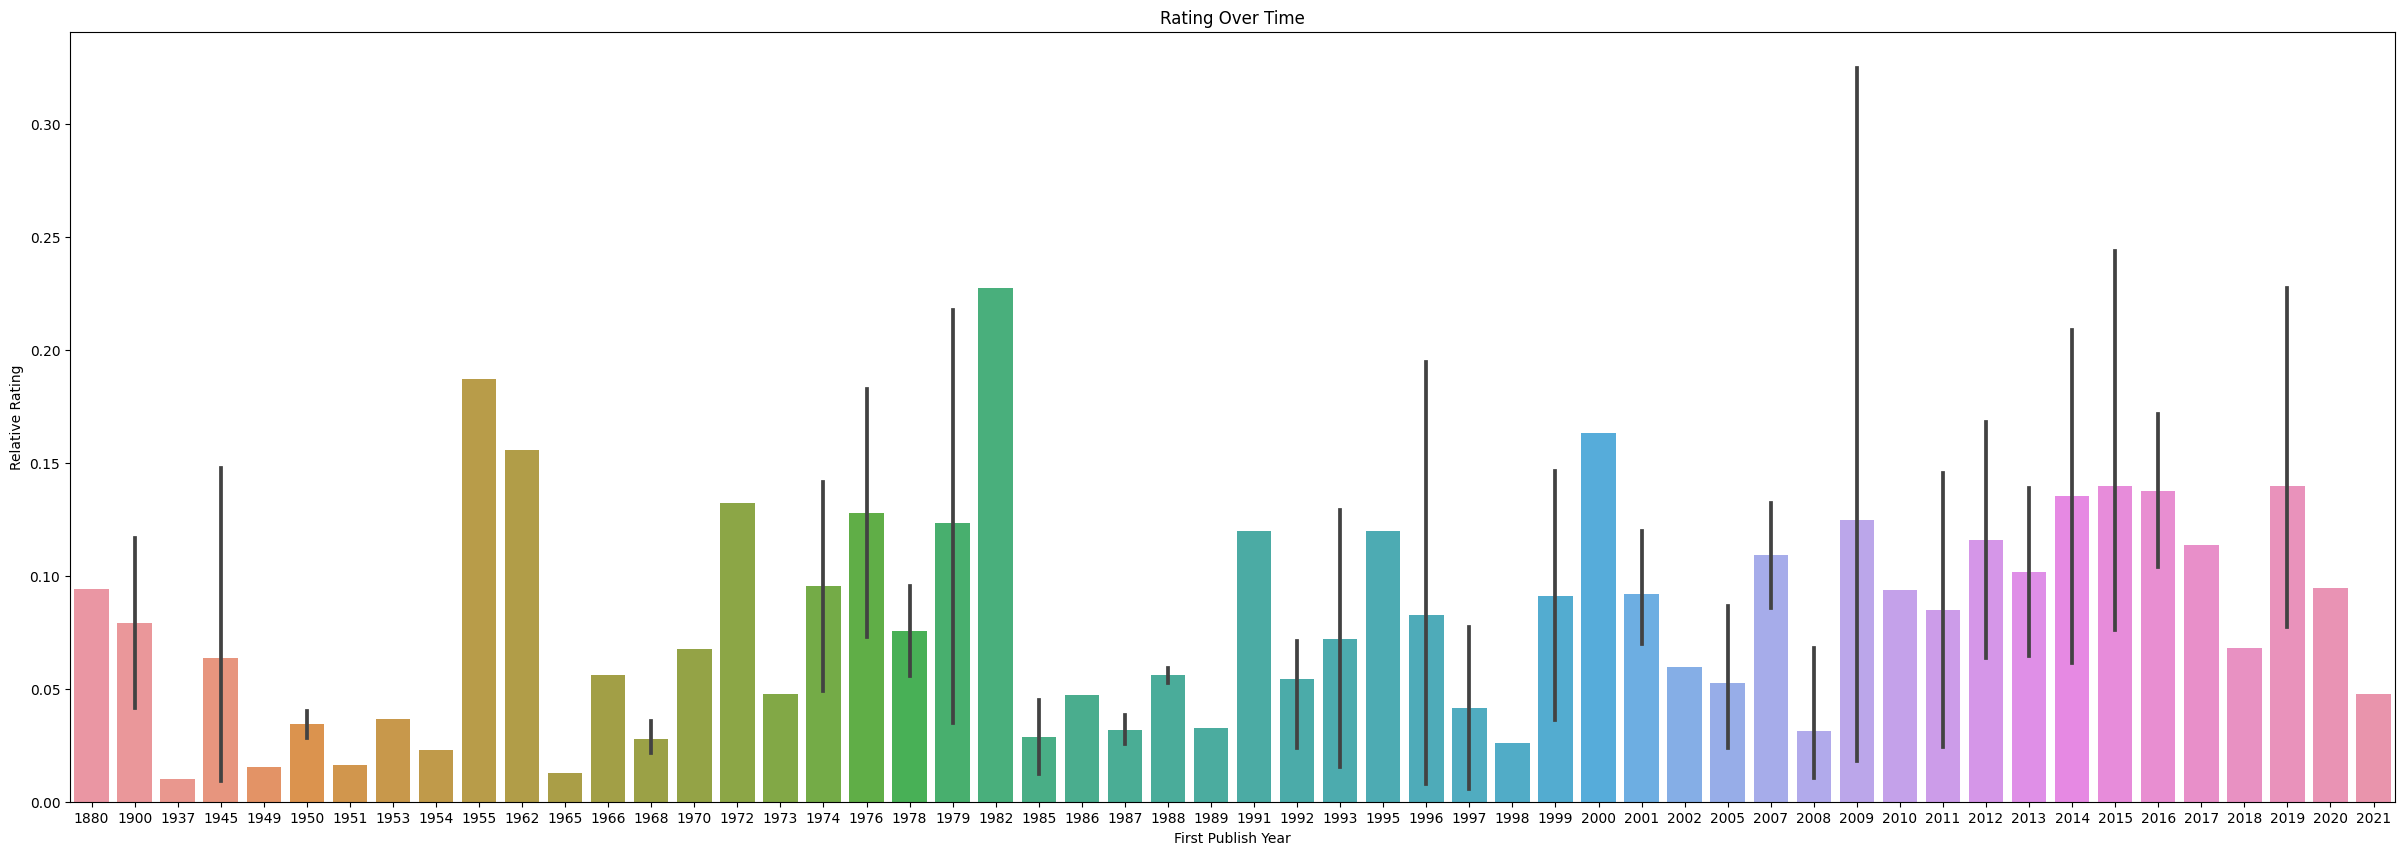

In [10]:
# Plot a bar graph of the first published year of each sci-fi book in relation to its relative rating.
fig, ax = plt.subplots(figsize=(30, 10))
sns.barplot(data=df_top_scifi_sorted, x='first_publish_year', y='relative_ratings', ax=ax).set(xlabel='First Publish Year', ylabel='Relative Rating', title ='Rating Over Time')
plt.show()

#### A.3.1. For additional context regarding the popularity of the genre, I want to look at the number of sci-fi books published in every year.

In [11]:
# Convert the list of publish years, which is registered as string type in the "publish_year" column, to list type.
df_top_scifi_sorted['publish_year'] = df_top_scifi_sorted['publish_year'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# The multiple publish year entries for each book is registered as a list, there needs to be one row per publish year for each book.
# Use explode method to make this division.
df_top_scifi_sorted_exp = df_top_scifi_sorted.explode('publish_year')

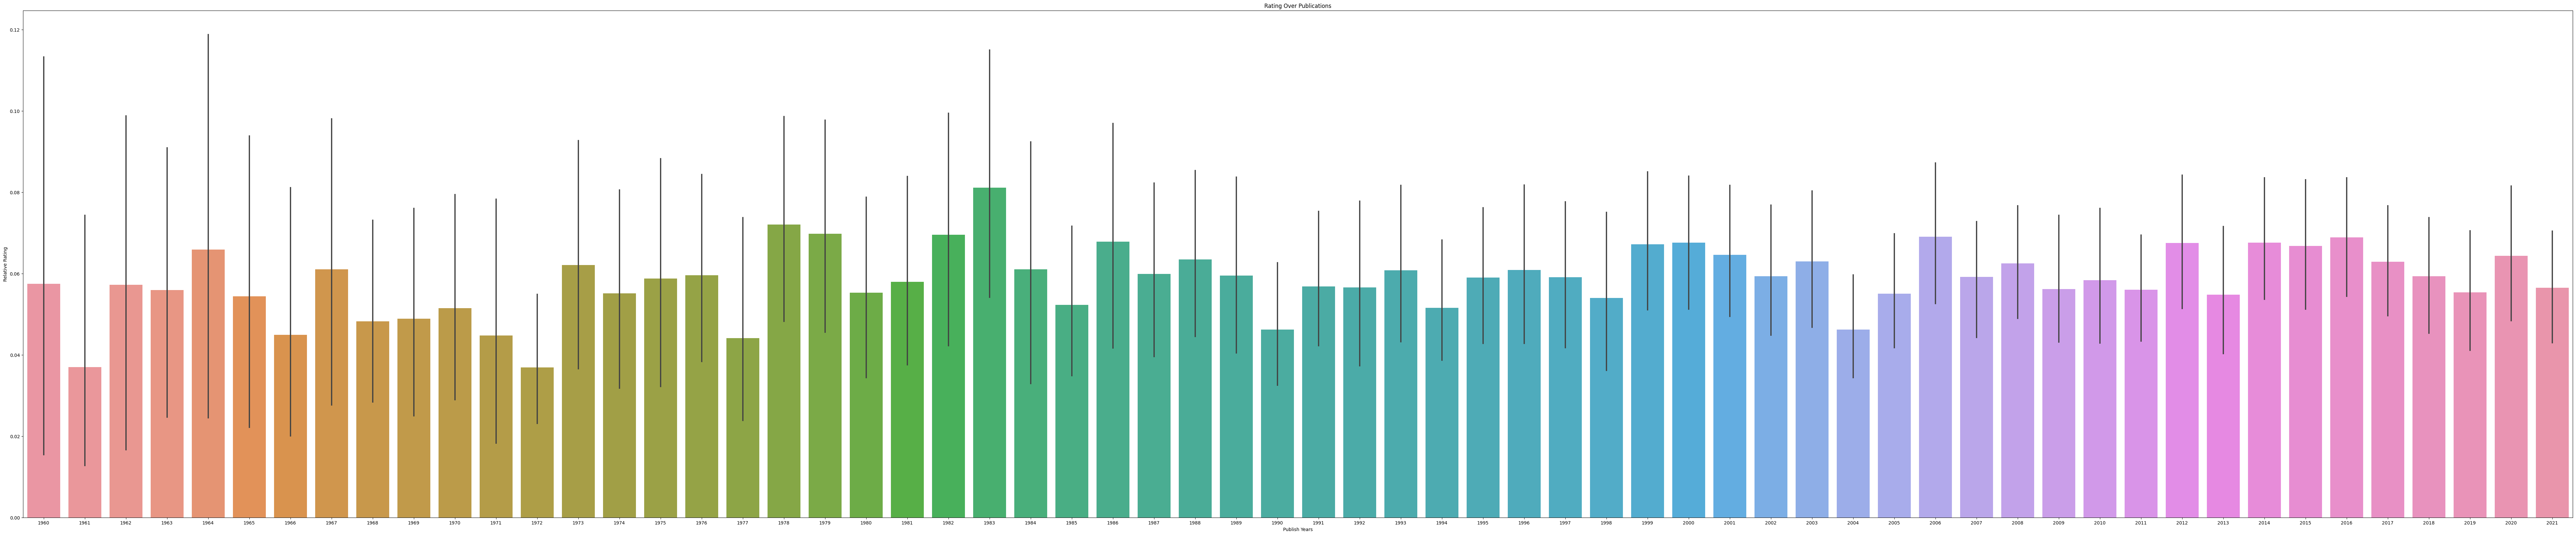

In [12]:
# Plot a bar graph of the publish year of all sci-fi books in relation to their relative rating.
fig, ax = plt.subplots(figsize=(100, 20))

# To stay consistent and relevant, remove the years before 1960 and after 2021.
df_top_scifi_sorted_exp = df_top_scifi_sorted_exp[(df_top_scifi_sorted_exp['publish_year'] >= 1960) & (df_top_scifi_sorted_exp['publish_year'] <= 2021)]

sns.barplot(data=df_top_scifi_sorted_exp, x='publish_year', y='relative_ratings', ax=ax).set(xlabel='Publish Years', ylabel='Relative Rating', title ='Rating Over Publications')
plt.show()

#### A.3.2. This demonstrates how many sci-fi books were published per year over time.
#### We can see that while there were rises and falls till the 90's, the genre remained generally popular since then.

###

### Step B:
#### B.1. Observe the number of translations of each book, to this day, based on its first publish date.

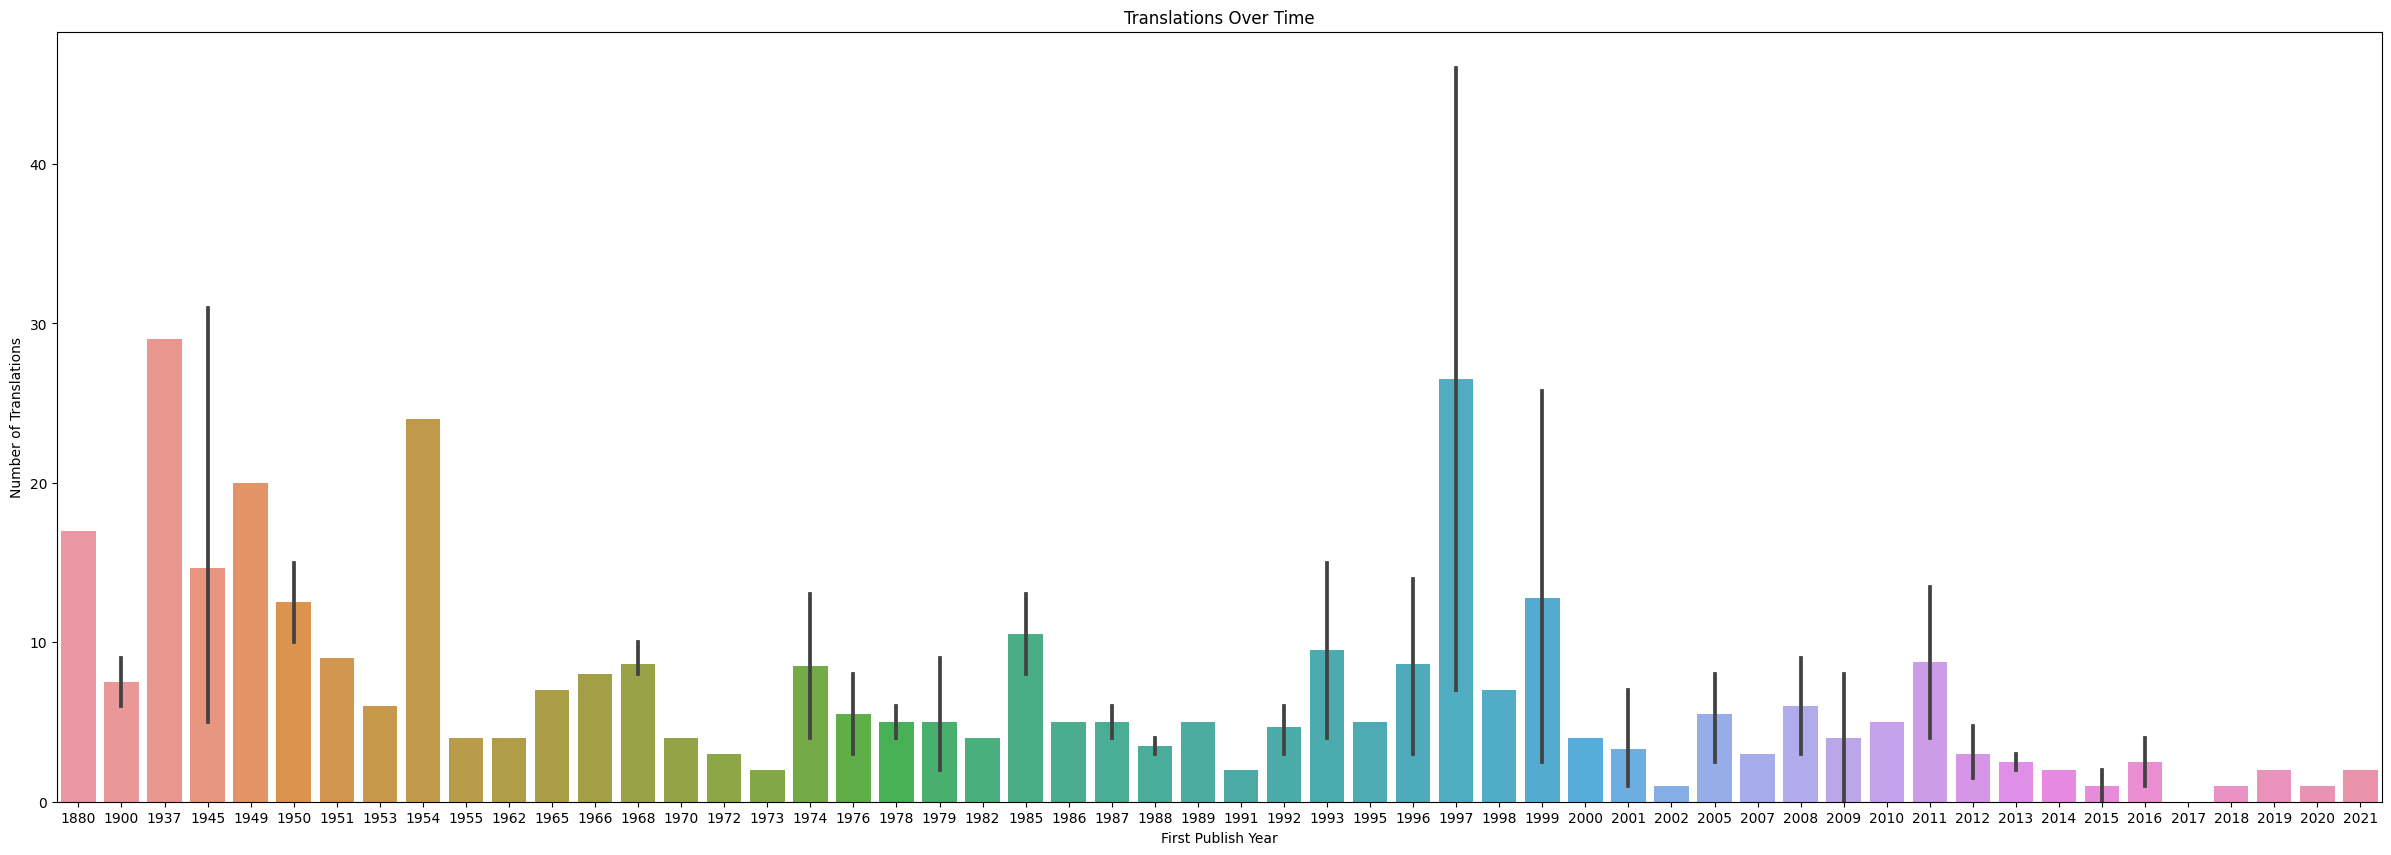

In [13]:
# Plot a bar graph of the first published year of each sci-fi book in relation to its number of translations.
fig, ax = plt.subplots(figsize=(30, 10))

sns.barplot(data=df_top_scifi_sorted_lan, x='first_publish_year', y='language_number', ax=ax).set(xlabel='First Publish Year', ylabel='Number of Translations', title ='Translations Over Time')
plt.show()

#### B.2. This is an indication of how widespread a book has become on an international level.

###

### Step C: Overlap the rating (popularity) and number of translations over time.

#### C.1. For better visual representation, the each of the previously shown graphs are presented as line graphs and then overlapped.

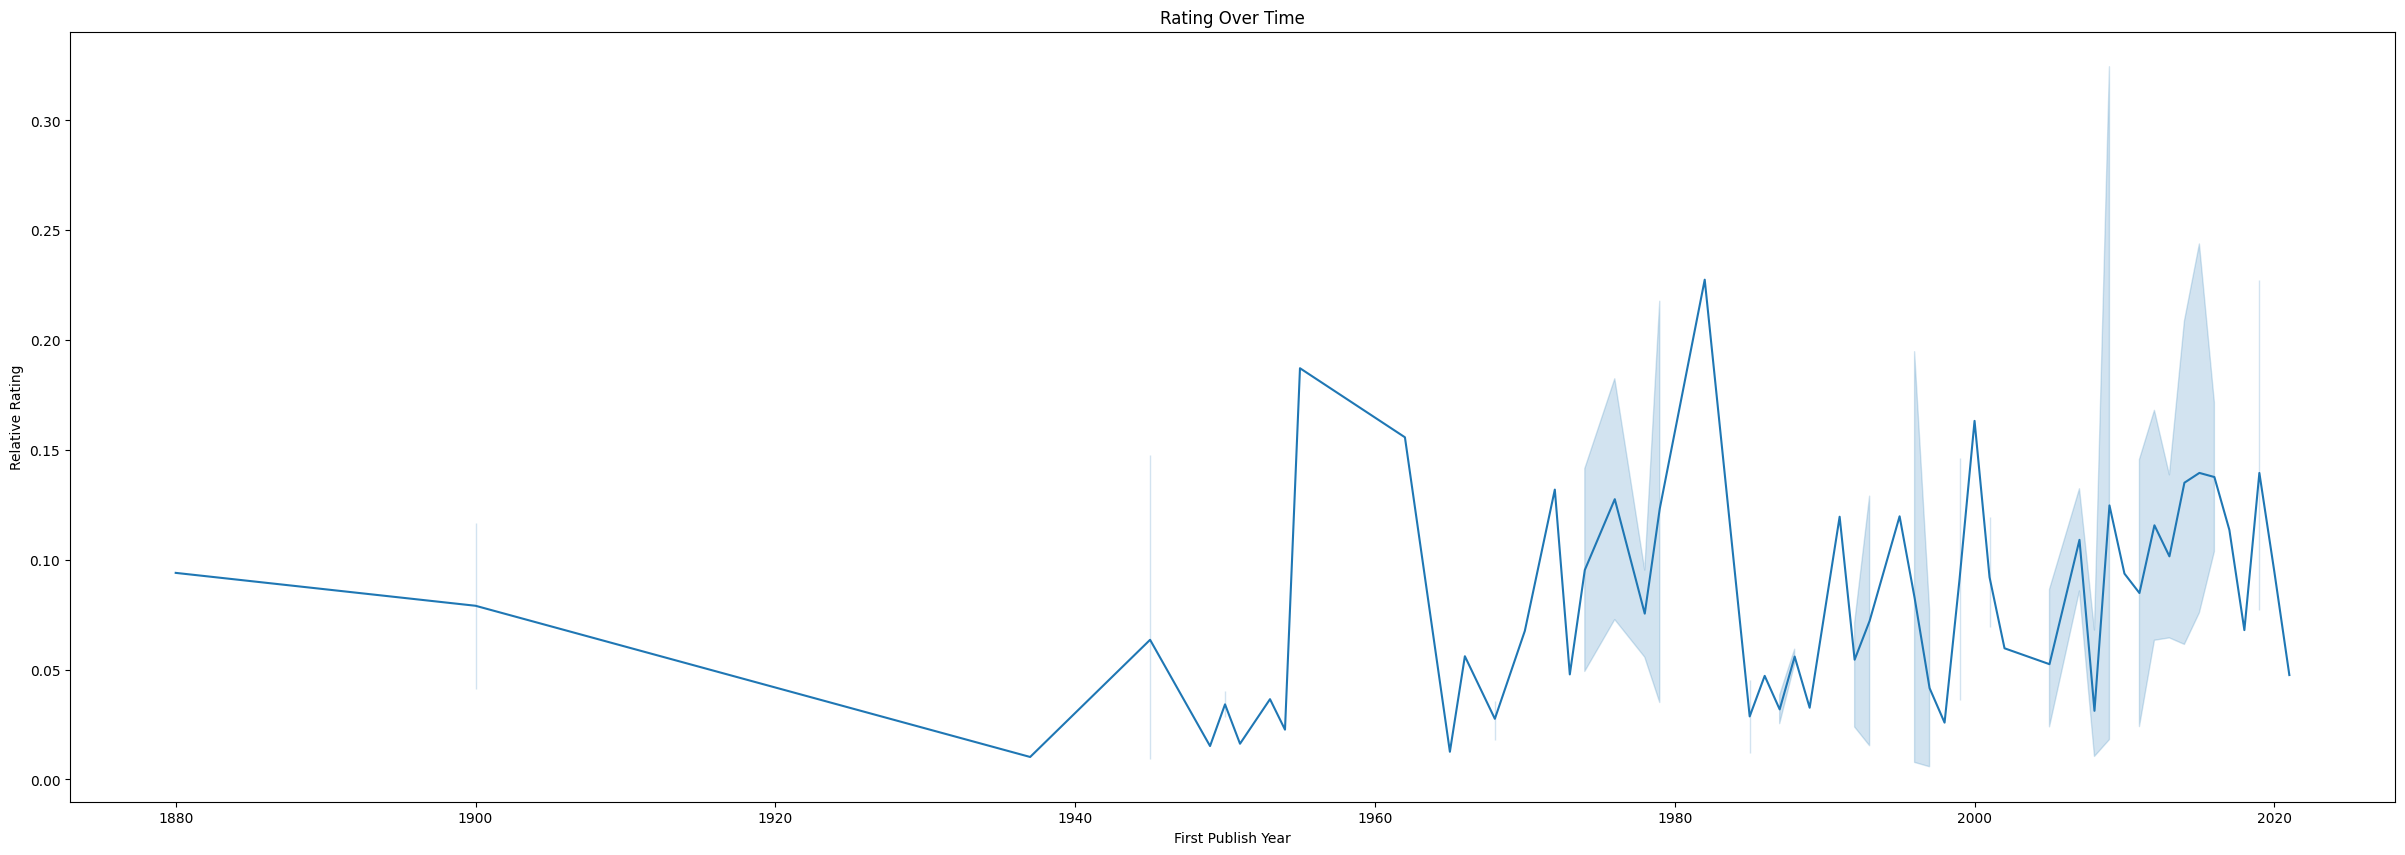

In [14]:
# Plot a line graph of the first published year of each sci-fi book in relation to its relative rating.
fig, ax = plt.subplots(figsize=(30, 10))

sns.lineplot(data=df_top_scifi_sorted, x='first_publish_year', y='relative_ratings', ax=ax).set(xlabel='First Publish Year', ylabel='Relative Rating', title ='Rating Over Time')
plt.show()

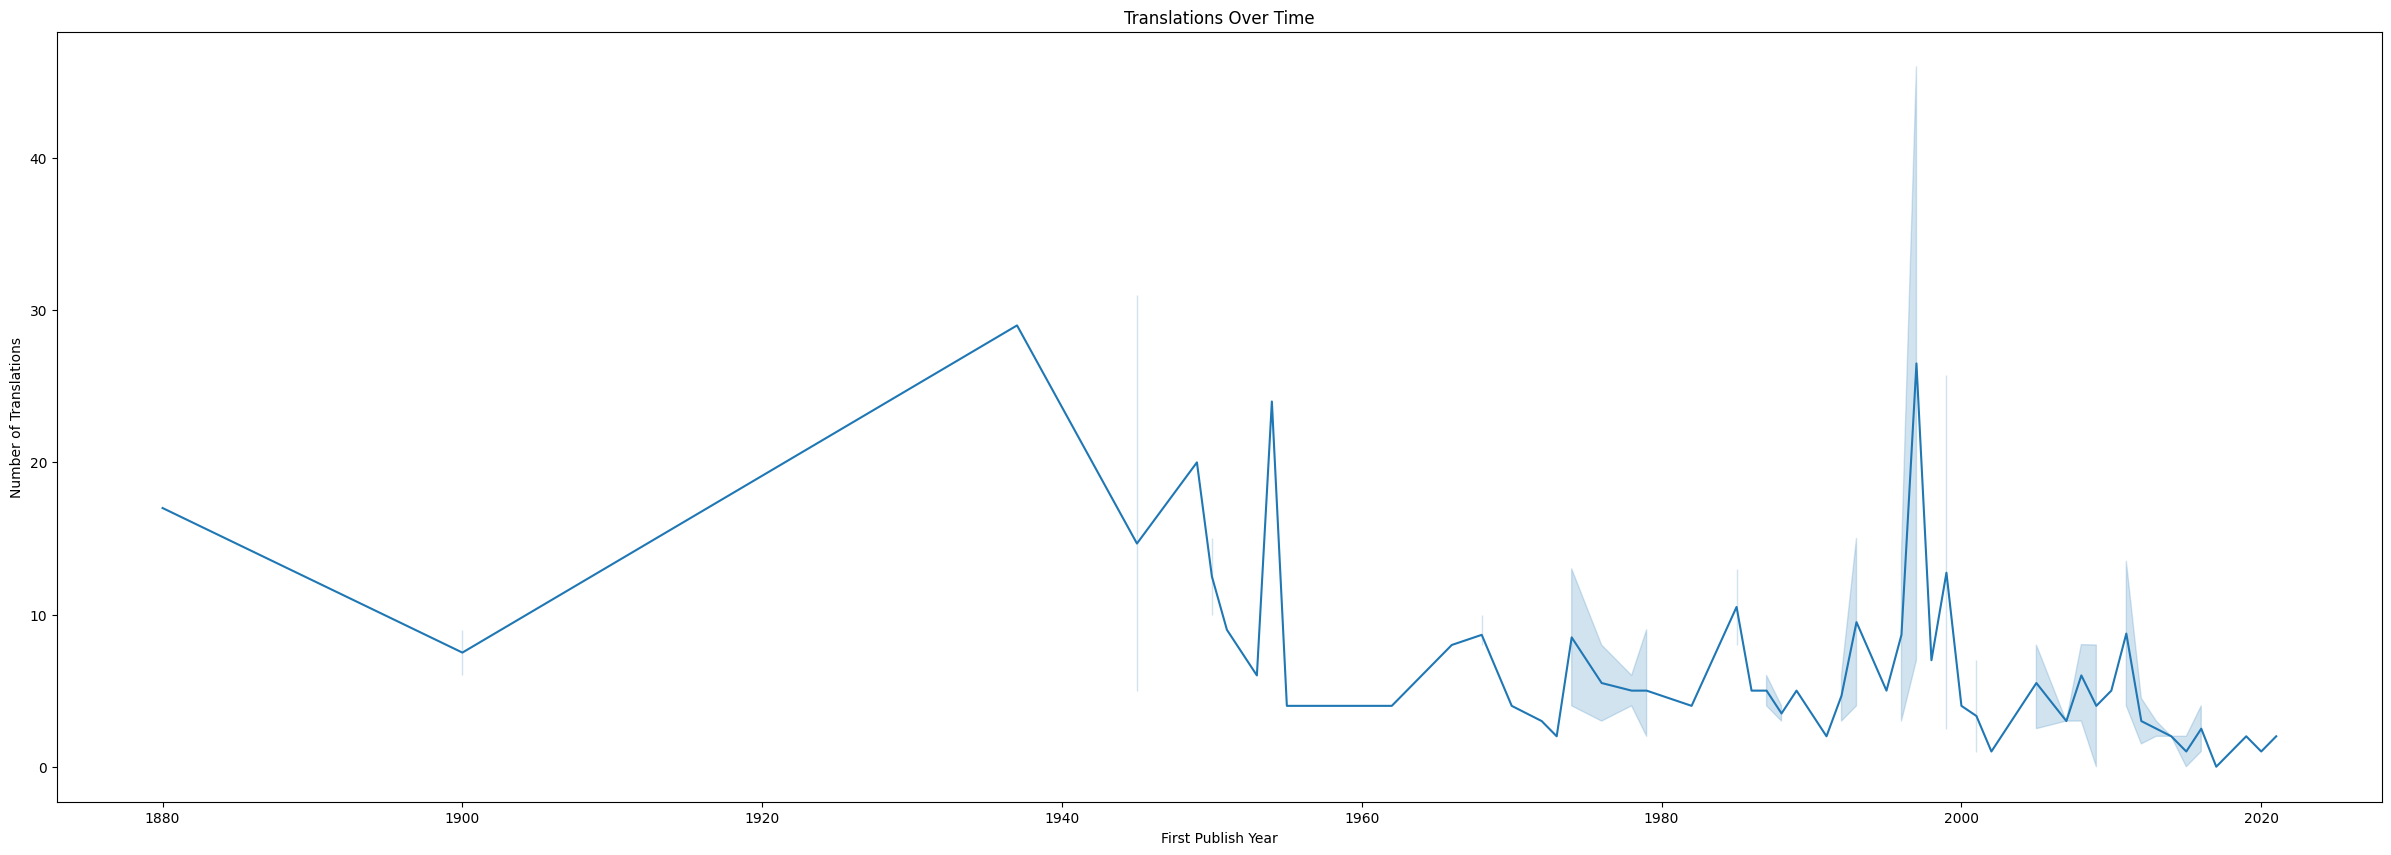

In [15]:
# Plot a line graph of the first published year of each sci-fi book in relation to its number of translations.
fig, ax = plt.subplots(figsize=(30, 10))

sns.lineplot(data=df_top_scifi_sorted_lan, x='first_publish_year', y='language_number', ax=ax).set(xlabel='First Publish Year', ylabel='Number of Translations', title ='Translations Over Time')
plt.show()

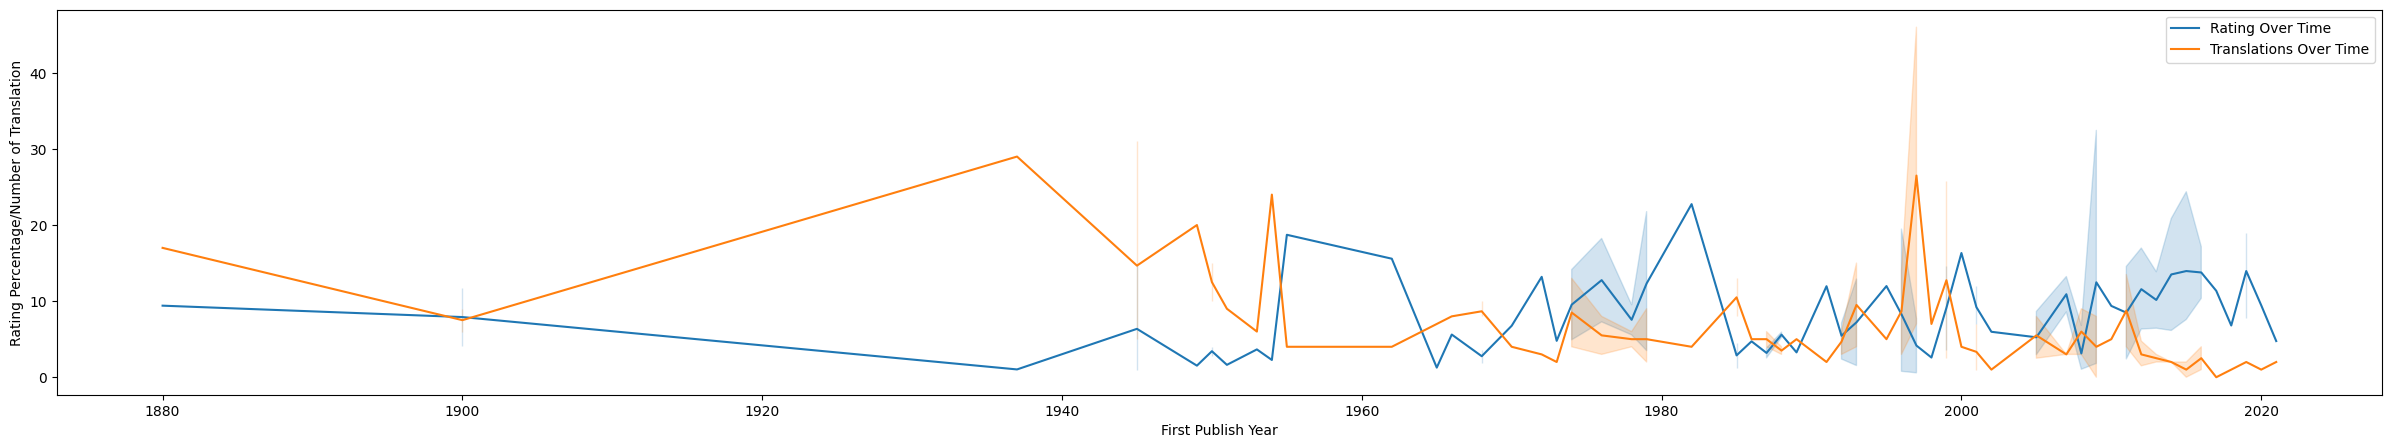

In [16]:
# Plot a line graph of the first published year of each sci-fi book in relation to its number of translations and relative rating percentage.
# This is basically overlapping the two previous graphs.
fig, ax = plt.subplots(figsize=(30, 5))

df_top_scifi_sorted['relative_ratings'] = df_top_scifi_sorted['ratings_average']*100/df_top_scifi_sorted['ratings_count']
sns.lineplot(data=df_top_scifi_sorted, x='first_publish_year', y='relative_ratings', ax=ax, label='Rating Over Time')
sns.lineplot(data=df_top_scifi_sorted_lan, x='first_publish_year', y='language_number', ax=ax, label='Translations Over Time')
ax.set_xlabel('First Publish Year')
ax.set_ylabel('Rating Percentage/Number of Translation')
ax.legend()

plt.show()

#### C.2. This demonstrates the correlation between the popularity of the books, and the genre as a whole, and the number of different translations they have received over time.

###

## Conclusion:

#### The first graph shows how popular a sci-fi book is now in relation to its first published year.
#### The second graph shows a sci-fi book's number of translations in relation to its first published year.
#### What we can conclude is how internationally popular books became throughout time.

#### Some instances of books written in the genre of scifi in mid 50's late 70's have are highly popular now, and we can see they were standing out among the rest from the same time period.
#### Books that are written since the mid 2000's till now all have relatively high rating, which means the genre popularity has increased, but there are no major standouts as there was the 50's and 70's. This could partially be due to more publications in the genre, meaning for one book to stand out, there is higher competition.

#### Another interesting aspect of the second graph is the change in number of translations over time.
#### The number of translations were high till mid 50's. After a decline, it remained relatively low till the 90's which, according to the previous graph, was a peak in popularity of sci-fi books and therefore, more translations were published.
#### However, as time went on, even though the genre gained popularity, the number of translations decreased and remained low. 
#### One speculation is that it is related to the fact that the internet and social networks were on the rise, and people around the globe were learning and communicating English, which led to them reading the books in English.

#

### Additionally, I would like to invite you to visit a streamlit page I created to parse the website and receive the dataset rightaway:
### https://openlibrary-parsing.streamlit.app/

#

# Thank you!
### Prepared by: Saeed Afghah

#